## **INTRODUÇÃO**

Este notebook visa a abordar uma variação do famoso `Problema dos Caixeiros Viajantes (PCV)`, adotando múltiplos caixeiros que se dividem entre as cidades e buscando a soma de caminhos dos caixeiros que possui a menor distância total, de forma a não permitir que eles passem pela mesma cidade. 

Neste trabalho, será implementado um algoritmo genético com a adaptação de cada etapa do Algoritmo Genético, desde a criação da população inicial até a visualização gráfica da melhor solução encontrada.


---

## **CÓDIGOS**

Primeiramente, claro, vamos importar as bibliotecas e funções definidas necessárias para o desenvolvimento do código:

In [1]:
from pprint import pprint
from functools import partial
from itertools import permutations

from funcoes_feras import plota_trajetos_caixeiros
from funcoes_feras import cria_cidades_caixeiro_2 as cria_cidades
from funcoes_feras import populacao_caixeiros
from funcoes_feras import funcao_objetivo_pop_caixeiros
from funcoes_feras import funcao_objetivo_caixeiros
from funcoes_feras import selecao_torneio_min as funcao_selecao
from funcoes_feras import cruzamento_ordenado_caixeiros as funcao_cruzamento
from funcoes_feras import mutacao_troca_caixeiros as funcao_mutacao

Além disso, definimos os hiperparâmetros utilizados no algoritmo, incluindo a quantidade de cidades a serem visitadas e o número de caixeiros:

In [2]:
NUM_CIDADES = 15
CIDADES = cria_cidades(NUM_CIDADES)
NUM_CAIXEIROS = 3

TAMANHO_POPULACAO = 100
NUM_GERACOES = 500
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

Analisamos as coordenadas das cidades que serão visitadas:

In [3]:
CIDADES

{'Cidade 0': (242, 73),
 'Cidade 1': (9, 291),
 'Cidade 2': (285, 296),
 'Cidade 3': (137, 223),
 'Cidade 4': (209, 80),
 'Cidade 5': (238, 255),
 'Cidade 6': (105, 288),
 'Cidade 7': (135, 253),
 'Cidade 8': (6, 179),
 'Cidade 9': (3, 221),
 'Cidade 10': (264, 112),
 'Cidade 11': (199, 106),
 'Cidade 12': (6, 38),
 'Cidade 13': (245, 237),
 'Cidade 14': (278, 25)}

E a partir disso, criamos uma população contendo indíviduos que indicam os caminhos completos das cidades de cada caixeiro, a partir de uma divisão por "|":

In [4]:
cria_populacao = partial(populacao_caixeiros, n_caixeiros=NUM_CAIXEIROS)

A população pode ser vista abaixo, mantendo o padrão de ["Cidades Visitadas Pelo Caixeiro 1", "|", "Cidades Visitadas Pelo Caixeiro ,"|", ...]:

In [5]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
pprint(populacao)

[['Cidade 2',
  'Cidade 1',
  'Cidade 0',
  'Cidade 4',
  'Cidade 3',
  '|',
  'Cidade 8',
  'Cidade 9',
  'Cidade 6',
  'Cidade 5',
  'Cidade 7',
  '|',
  'Cidade 10',
  'Cidade 14',
  'Cidade 13',
  'Cidade 11',
  'Cidade 12'],
 ['Cidade 1',
  'Cidade 2',
  'Cidade 4',
  'Cidade 0',
  'Cidade 3',
  '|',
  'Cidade 8',
  'Cidade 9',
  'Cidade 6',
  'Cidade 7',
  'Cidade 5',
  '|',
  'Cidade 14',
  'Cidade 10',
  'Cidade 12',
  'Cidade 13',
  'Cidade 11'],
 ['Cidade 3',
  'Cidade 1',
  'Cidade 0',
  'Cidade 2',
  'Cidade 4',
  '|',
  'Cidade 8',
  'Cidade 9',
  'Cidade 6',
  'Cidade 5',
  'Cidade 7',
  '|',
  'Cidade 14',
  'Cidade 13',
  'Cidade 12',
  'Cidade 10',
  'Cidade 11'],
 ['Cidade 4',
  'Cidade 3',
  'Cidade 1',
  'Cidade 0',
  'Cidade 2',
  '|',
  'Cidade 8',
  'Cidade 5',
  'Cidade 6',
  'Cidade 9',
  'Cidade 7',
  '|',
  'Cidade 12',
  'Cidade 10',
  'Cidade 11',
  'Cidade 13',
  'Cidade 14'],
 ['Cidade 2',
  'Cidade 4',
  'Cidade 1',
  'Cidade 3',
  'Cidade 0',
  '|',
  '

Definimos a nossa função que analisará os melhores avaliados no nosso algoritmo com as cidades analisadas sendo as cidades que definimos de forma aleatória anteriormente:

In [6]:
funcao_objetivo = partial(funcao_objetivo_pop_caixeiros, cidades=CIDADES)

A partir disso, realizamos o processo evolutivo por gerações na busca do "*hall da fama*" que contenha o nosso melhor indivíduo (caminho) encontrado:

In [7]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)

    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

Com isso, obtemos o fitness do nosso melhor indivíduo e realizamos a plotagem dos caminhos encontrados no intuito de realizar uma análise mais gráfica de qual caminho cada caixeiro irá percorrer:

Melhor individuo obtido por algoritmos genéticos:
['Cidade 1', 'Cidade 3', 'Cidade 4', 'Cidade 0', 'Cidade 2', '|', 'Cidade 8', 'Cidade 9', 'Cidade 6', 'Cidade 7', 'Cidade 5', 'Cidade 13', 'Cidade 11', 'Cidade 12', '|', 'Cidade 10', 'Cidade 14'] com distância: 1330.050657029996



c:\Users\caio24034\OneDrive - ILUM ESCOLA DE CIÊNCIA\VSZADA ILUMZADA\Cassarzinho\Redes Neurais e Algoritmos Genéticos\Feras Formidáveis\funcoes_feras.py:1420: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


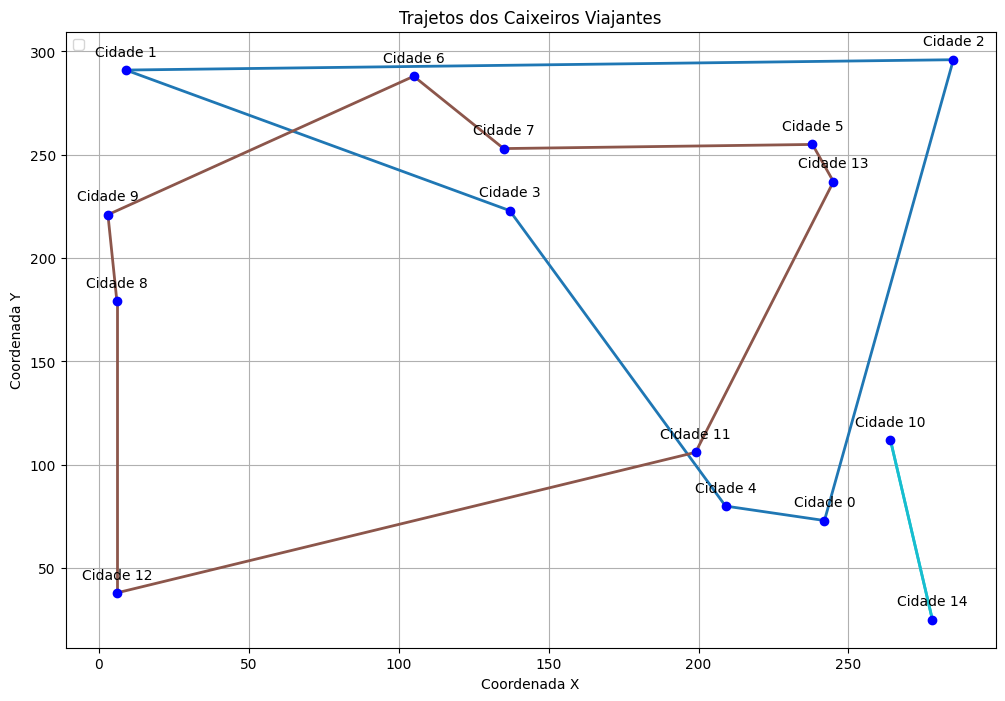

In [8]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiros(melhor_individuo_observado, CIDADES)

print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajetos_caixeiros(CIDADES, melhor_individuo_observado)

---

## **CONCLUSÃO**

Nessa atividade, foi possível desenvolver, com sucesso, um algoritmo genético para uma adaptação do PCV: o `Problema dos Múltiplos Caixeiros Viajantes`. A partir da adaptação dos passos de criação de população (para dividir as cidades entre os caixeiros), cruzamento e mutação, no intuito de buscar, a partir de indíviduos (caminhos) válidos, o candidato com menor soma total da distância caminhada pelos caixeiros.

A partir de um processo evolutivo por épocas, foi possível obter um indivíduo válido, respeitando a estrutura do problema e permitindo uma visualização final, que plota as rotas de cada caixeiro, confirmando que a solução encontrada é coesa.

---

## **REFERÊNCIAS**

**[1]** CASSAR, Daniel. Redes Neurais e Algoritmos Genéticos. 2025. Material de Aula.